In [2]:
import subprocess as sp
import matplotlib.pyplot as plt

from __init__ import *
from snmcseq_utils import create_logger
from snmcseq_utils import cd

In [3]:
log = create_logger()
log.info('.')

04/03/2018 09:03:15 PM .


In [4]:
dataset = 'CEMBA_3F_180109'
path_dataset = os.path.join(PATH_DATASETS, dataset)

# Gzip to bgzip

In [ ]:
# make allc folder and symlic from from_ecker_lab

os.makedirs(os.path.join(path_dataset, 'allc'))

## Case 1

In [5]:
# allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))

# should be parallelized in the future
# for i, allc_folder in enumerate(allc_folders):
data_folder = os.path.join(PATH_DATASETS, dataset, 'from_ecker_lab')
with cd(data_folder):
    allc_files = glob.glob('allc_*.tsv.gz')
    allc_files = glob.glob('allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz')
    for i, allc_file in enumerate(allc_files):
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        
        src = allc_file
        
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_files), src))
        
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])

03/18/2018 08:48:27 PM gzip to bgzip (1/1): allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz


## Case 2

In [ ]:
allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))
# should be parallelized in the future
for i, allc_folder in enumerate(allc_folders):
    with cd(allc_folder):
        allc_files = glob.glob('allc_*.tsv.gz')
        assert len(allc_files) == 1
        src = allc_files[0]
    
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_folders), src))
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])


# Tabix index

In [7]:
# try tabix (could be parallelized)
with cd(os.path.join(path_dataset, 'allc')):
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', '*'))
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', 'allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.bgz'))
    for i, allc_file in enumerate(allc_files):
        os.system('tabix -f -s 1 -b 2 -e 2 -S 0 ' + allc_file) 
        logging.info("Done tabix indexing ({}/{}): {}".format(i+1, len(allc_files), allc_file))

03/18/2018 08:49:32 PM Done tabix indexing (1/1): /cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/CEMBA_RS2_17Q4/allc/allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.bgz


# Mapping summary

In [6]:
# mapping summary
f = os.path.join(PATH_REFERENCES, 'Mapping_summary', 'CEMBA_3F_180109_summary.txt')
df = pd.read_table(f) 
# filter
print(df.shape)
df.head()


(1059, 15)


,Sample,Total reads,Mapped reads,Mapping rate,Nonclonal reads,% Nonclonal rate,Filtered reads,Filtered rate,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered
0,180221_CEMBA_mm_P56_P63_3F_CEMBA180109_3F_5_CE...,5701272,3354313,0.588,2572042,0.767,2112242,0.821,NaN,0.00352,0.74345,0.00619,0.74254,0.00268,8.51
1,180221_CEMBA_mm_P56_P63_3F_CEMBA180109_3F_5_CE...,1614968,798002,0.494,670127,0.840,520836,0.777,NaN,0.00587,0.76102,0.02385,0.75961,0.01809,2.13
2,180221_CEMBA_mm_P56_P63_3F_CEMBA180109_3F_5_CE...,2662216,1388782,0.522,1072906,0.773,867718,0.809,NaN,0.00595,0.76269,0.02534,0.76127,0.01951,3.48
3,180221_CEMBA_mm_P56_P63_3F_CEMBA180109_3F_5_CE...,3194714,1702890,0.533,1329898,0.781,1075300,0.809,0.0,0.00557,0.78504,0.02158,0.78384,0.01610,4.32
4,180221_CEMBA_mm_P56_P63_3F_CEMBA180109_3F_5_CE...,3670262,2032817,0.554,1433126,0.705,1153386,0.805,0.0,0.00700,0.78334,0.03233,0.78181,0.02551,4.66


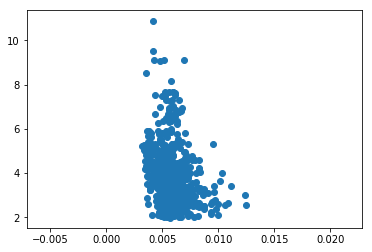

In [7]:

fig, ax = plt.subplots()
ax.scatter(df['mCCC/CCC'].values, df['% Genome covered'].values)
plt.show()


In [10]:
# move allc to allc trash

df.loc[df['mCCC/CCC'] > 0.02]

df.set_index('Sample').to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
                      sep='\t', na_rep='NA', header=True, index=True)

# truncate mapping summary and copy that into right place

In [17]:
with cd(path_dataset)
    allc_files = sorted(glob.glob('./allc/allc_*.tsv.bgz'))
    cells = [os.path.basename(allc_file)[len('allc_'): -len('.tsv.bgz')] for allc_file in allc_files]
df_meta_dataset = df.set_index('Sample').loc[cells, :]

In [9]:
print(df_meta_dataset.shape)

df_meta_dataset.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
                      sep='\t', na_rep='NA', header=True, index=True)
df_meta_dataset.head()

NameError: name 'df_meta_dataset' is not defined